<a href="https://colab.research.google.com/github/chitranshu1409/Accredian-backend-task/blob/main/Arms4ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install -y gdal-bin python3-gdal
!gdalinfo --version


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [ ]:
import os

# Create data folder
os.makedirs("data", exist_ok=True)

# Download dataset
!wget -O data/data.zip "https://objectstore.e2enetworks.net/btechtasksampledata/data.zip"

# Extract
!unzip -o data/data.zip -d data

# Show files
!ls -R data


--2025-11-16 18:52:19--  https://objectstore.e2enetworks.net/btechtasksampledata/data.zip
Resolving objectstore.e2enetworks.net (objectstore.e2enetworks.net)... 164.52.206.154, 101.53.136.18, 164.52.206.155, ...
Connecting to objectstore.e2enetworks.net (objectstore.e2enetworks.net)|164.52.206.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1405471926 (1.3G) [application/zip]
Saving to: ‘data/data.zip’

data/data.zip       100%[===================>]   1.31G  12.8MB/s    in 2m 2s   

2025-11-16 18:54:23 (10.9 MB/s) - ‘data/data.zip’ saved [1405471926/1405471926]

Archive:  data/data.zip
  inflating: data/data/6_20241124_054614_762_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif  
  inflating: data/data/19_20241129_054357_865_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif  
  inflating: data/data/.DS_Store     
  inflating: data/__MACOSX/data/._.DS_Store  
  inflating: data/data/17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif  
  inflating: data/

In [ ]:
import glob

# Recursively find all .tif files
tif_paths = glob.glob("data/**/*.tif", recursive=True)

print("Found tiles:")
for p in tif_paths:
    print(" -", p)

print("\nTotal tiles:", len(tif_paths))


Found tiles:
 - data/data/17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/32_20240716_043003_536_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/18_20241129_054358_499_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/34_20240716_043002_264_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/7_20241124_054614_128_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/6_20241124_054614_762_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/19_20241129_054357_865_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/5_20241124_054615_396_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/33_20240716_043002_901_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
 - data/data/4_20241124_054616_030_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif

Total tiles: 10


In [ ]:
# Write file list for GDAL
with open("tiles.txt", "w") as f:
    for p in tif_paths:
        f.write(p + "\n")

print("Created tiles.txt")
!cat tiles.txt


Created tiles.txt
data/data/17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/32_20240716_043003_536_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/18_20241129_054358_499_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/34_20240716_043002_264_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/7_20241124_054614_128_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/6_20241124_054614_762_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/19_20241129_054357_865_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/5_20241124_054615_396_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/33_20240716_043002_901_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif
data/data/4_20241124_054616_030_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif


In [ ]:
!gdalwarp -overwrite -multi -wo NUM_THREADS=ALL_CPUS \
    -r near \
    -srcnodata 0 -dstnodata 0 \
    --optfile tiles.txt \
    cloudless_mosaic.tif

print("Mosaic created successfully: cloudless_mosaic.tif")


Creating output file that is 29088P x 27803L.
Using band 4 of destination image as alpha.
Processing data/data/17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif [1/10] : 0Using band 4 of source image as alpha.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing data/data/32_20240716_043003_536_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif [2/10] : 0Using band 4 of source image as alpha.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing data/data/18_20241129_054358_499_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif [3/10] : 0Using band 4 of source image as alpha.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing data/data/34_20240716_043002_264_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif [4/10] : 0Using band 4 of source image as alpha.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing data/data/7_20241124_054614_128_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif [5/10] : 0Using band 4 of source im

In [ ]:
import rasterio

with rasterio.open("cloudless_mosaic.tif") as src:
    print("CRS:", src.crs)
    print("Resolution:", src.res)
    print("Width, Height:", src.width, src.height)
    print("Bounds:", src.bounds)
    print("NoData value:", src.nodata)


CRS: EPSG:3857
Resolution: (0.9356054896919204, 0.9356054896918405)
Width, Height: 29088 27803
Bounds: BoundingBox(left=8717628.303571457, bottom=3522731.2600538987, right=8744843.196055615, top=3548743.899483801)
NoData value: 0.0


Downsampled data shape: (4, 2780, 2908)


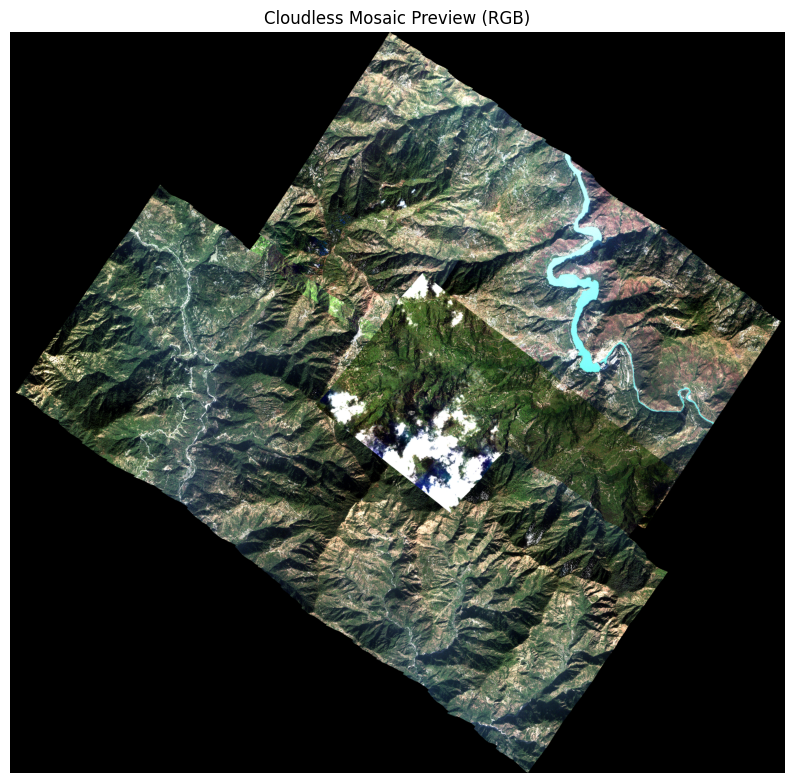

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

DOWNSAMPLE = 10  # Increase for lower RAM usage

with rasterio.open("cloudless_mosaic.tif") as src:
    data = src.read(
        out_shape=(
            src.count,
            src.height // DOWNSAMPLE,
            src.width // DOWNSAMPLE
        )
    )

print("Downsampled data shape:", data.shape)

plt.figure(figsize=(10,10))

if data.shape[0] >= 3:
    rgb = np.stack([data[0], data[1], data[2]], axis=-1).astype(float)

    # Stretch contrast
    p2, p98 = np.percentile(rgb, (2, 98))
    rgb = np.clip((rgb - p2) / (p98 - p2 + 1e-9), 0, 1)

    plt.imshow(rgb)
    plt.title("Cloudless Mosaic Preview (RGB)")
else:
    plt.imshow(data[0], cmap="gray")
    plt.title("Cloudless Mosaic Preview (Single Band)")

plt.axis("off")
plt.show()

